In [ ]:
import numpy as np
import pandas as pd
from nilearn import datasets, image
from nilearn.input_data import NiftiLabelsMasker

In [31]:
fmri_file = "/Users/hyunsung/Desktop/ADHD-200/Peking_1/1056121/sfnwmrda1056121_session_1_rest_1.nii.gz"
fmri_img = image.load_img(fmri_file)  # fMRI 데이터 로드
fmri_img.shape

(49, 58, 47, 232)

In [5]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17, resolution_mm=1)
atlas_filename = atlas.maps  # 1mm 해상도의 Atlas 이미지
labels = atlas.labels  # ROI 이름 리스트

[get_dataset_dir] Dataset found in /Users/hyunsung/nilearn_data/schaefer_2018


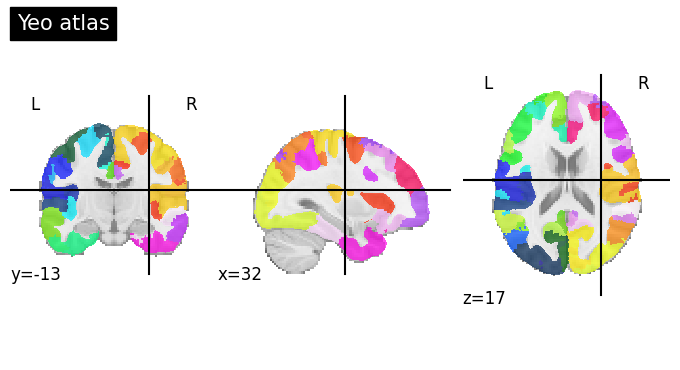

In [6]:
from nilearn.plotting import plot_roi, show

plot_roi(atlas.maps, title="Yeo atlas")

In [37]:
len(atlas)

3

In [30]:
print(atlas.description)

.. _schaefer_atlas:

Schaefer 2018 atlas

Access
------
See :func:`nilearn.datasets.fetch_atlas_schaefer_2018`.

Notes
-----
This atlas (:footcite:t:`schaefer_atlas`) provides a labeling of cortical voxels in the MNI152
space, see :footcite:t:`Schaefer2017`.
Each ROI is annotated with a network from the :term:`parcellation`
(7- or 17-network solution; see :footcite:t:`Yeo2011`).

Different versions of the atlas are available, varying in
- number of rois (100 to 1000),
- network annotation (7 or 17)
- spatial resolution of the atlas (1 or 2 mm)

Content
-------
    :'maps': 3D Nifti image, values are indices in the list of labels.
    :'labels': ROI labels including Yeo-network annotation.
    :'description': A short description of the atlas and some references.

References
----------

.. footbibliography::

License
-------
MIT



In [22]:
labels

array([b'17Networks_LH_VisCent_ExStr_1', b'17Networks_LH_VisCent_ExStr_2',
       b'17Networks_LH_VisCent_Striate_1',
       b'17Networks_LH_VisCent_ExStr_3',
       b'17Networks_LH_VisPeri_ExStrInf_1',
       b'17Networks_LH_VisPeri_StriCal_1',
       b'17Networks_LH_VisPeri_ExStrSup_1', b'17Networks_LH_SomMotA_1',
       b'17Networks_LH_SomMotA_2', b'17Networks_LH_SomMotB_Aud_1',
       b'17Networks_LH_SomMotB_S2_1', b'17Networks_LH_SomMotB_S2_2',
       b'17Networks_LH_SomMotB_Cent_1',
       b'17Networks_LH_DorsAttnA_TempOcc_1',
       b'17Networks_LH_DorsAttnA_ParOcc_1',
       b'17Networks_LH_DorsAttnA_SPL_1',
       b'17Networks_LH_DorsAttnB_PostC_1',
       b'17Networks_LH_DorsAttnB_PostC_2',
       b'17Networks_LH_DorsAttnB_PostC_3',
       b'17Networks_LH_DorsAttnB_FEF_1',
       b'17Networks_LH_SalVentAttnA_ParOper_1',
       b'17Networks_LH_SalVentAttnA_Ins_1',
       b'17Networks_LH_SalVentAttnA_Ins_2',
       b'17Networks_LH_SalVentAttnA_ParMed_1',
       b'17Networks_LH_

In [19]:
fmri_img.shape

(49, 58, 47, 232)

In [ ]:
resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest")
resampled_atlas.shape

/var/folders/p_/q8q1sch97wvdkf28vk_l7wsh0000gn/T/ipykernel_69869/3550286350.py:1: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest")
/opt/anaconda3/envs/nilearn/lib/python3.9/site-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


(49, 58, 47)

In [20]:
masker = NiftiLabelsMasker(labels_img=resampled_atlas, standardize=True)
time_series = masker.fit_transform(fmri_img)
time_series.shape

(232, 100)

In [21]:
time_series.sum(axis=0)

array([-1.9073486e-06, -1.6689301e-06, -6.0796738e-06,  3.1888485e-06,
       -1.4305115e-06, -1.3113022e-06,  4.7683716e-06,  3.0994415e-06,
        1.3113022e-06, -2.7418137e-06, -3.9339066e-06, -2.2947788e-06,
        2.2500753e-06, -4.7683716e-07,  1.7881393e-07,  8.4936619e-07,
       -3.5762787e-07, -3.1888485e-06,  5.6624413e-06,  7.4505806e-07,
        4.4107437e-06,  4.8279762e-06,  0.0000000e+00,  6.6757202e-06,
        1.3709068e-06, -7.1935356e-06,  1.7173588e-06, -2.3841858e-07,
        6.1988831e-06,  1.1920929e-06, -2.0861626e-06,  5.9604645e-07,
       -7.1525574e-07,  1.0132790e-06,  2.6226044e-06,  4.3511391e-06,
        8.3446503e-07,  3.1590462e-06,  7.1525574e-07,  5.7220459e-06,
       -1.7881393e-07,  5.1856041e-06, -2.7418137e-06,  8.3446503e-07,
       -2.3841858e-07, -5.7071447e-06,  8.2850456e-06, -4.7683716e-07,
        1.3113022e-06, -3.8370490e-06, -2.9802322e-07, -2.1755695e-06,
        4.3511391e-06, -3.7848949e-06, -4.2915344e-06,  4.0531158e-06,
      

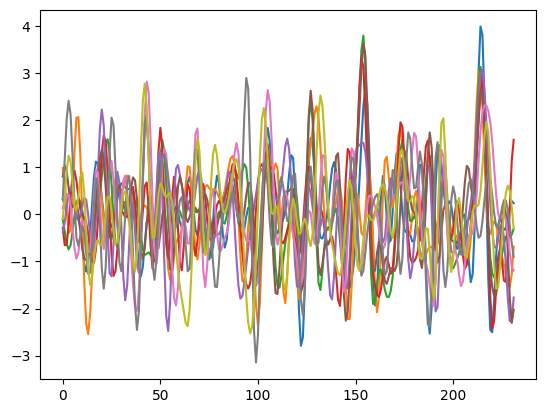

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time_series[:, 1:10])

## Load modules

In [3]:
import numpy as np
import pandas as pd
from nilearn import datasets, image
from nilearn.input_data import NiftiLabelsMasker
import os

## Download  Schaefer 2018 17-network Atlas

[get_dataset_dir] Dataset found in /Users/hyunsung/nilearn_data/schaefer_2018


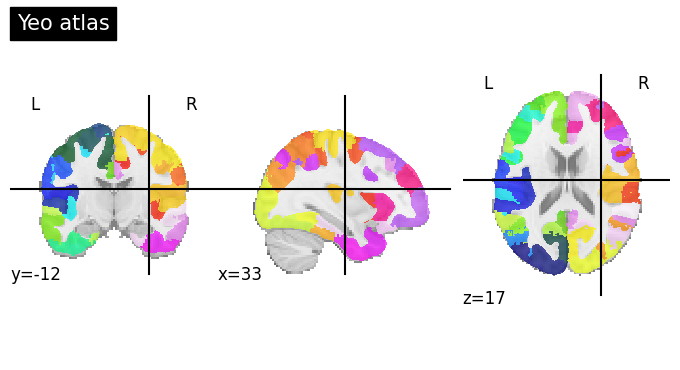

In [4]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=1)
atlas_filename = atlas.maps  # 1mm 해상도의 Atlas 이미지
labels = [x.decode() for x in atlas.labels]  # ROI 이름 리스트

from nilearn.plotting import plot_roi, show
plot_roi(atlas.maps, title="Yeo atlas")

[get_dataset_dir] Dataset found in /Users/hyunsung/nilearn_data/schaefer_2018


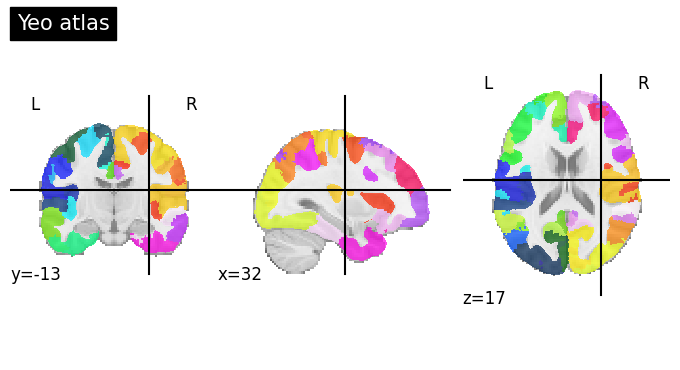

In [37]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17, resolution_mm=1)
atlas_filename = atlas.maps  # 1mm 해상도의 Atlas 이미지
labels = [x.decode() for x in atlas.labels]  # ROI 이름 리스트

from nilearn.plotting import plot_roi, show
plot_roi(atlas.maps, title="Yeo atlas")

[get_dataset_dir] Dataset found in /Users/hyunsung/nilearn_data/schaefer_2018


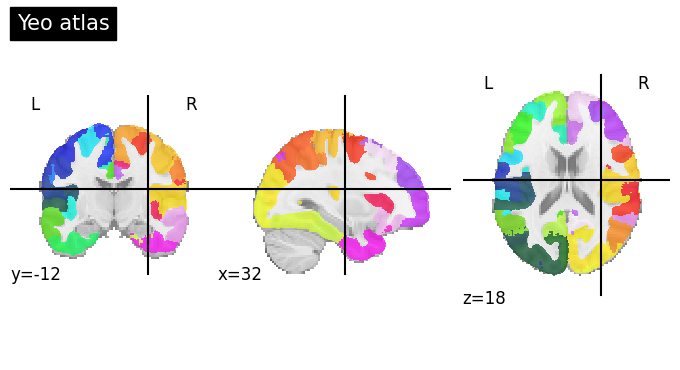

In [24]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=1)
atlas_filename = atlas.maps  # 1mm 해상도의 Atlas 이미지
labels = [x.decode() for x in atlas.labels]  # ROI 이름 리스트

from nilearn.plotting import plot_roi, show
plot_roi(atlas.maps, title="Yeo atlas")

## Test for extracting signals

In [3]:
path = "/Users/hyunsung/Desktop/ADHD-200/Peking_1"
#os.listdir(path)
ids = [f for f in os.listdir(path) if f.isdigit()]
# ids

In [ ]:
for i, f in enumerate(ids[0:1]):
    file_path = path + "/" + f
    nii_file = [ff for ff in os.listdir(file_path) if ff.endswith(".nii.gz")][0]
    nii_file = file_path + "/" + nii_file
    fmri_img = image.load_img(nii_file)  # Load fMRI data (nii.gz file)

    # Resampling
    resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest")
    # resampled_atlas.shape

    # Extract fMRI time series for each ROI
    masker = NiftiLabelsMasker(labels_img=resampled_atlas, standardize=True)
    time_series = masker.fit_transform(fmri_img)
    time_series_df = pd.DataFrame(time_series, columns=labels).T
    time_series_df = time_series_df.reset_index().rename(columns={"index": "RegionName"})
    # time_series.shape

    # # Concatenate with phenotypes data
    # # df = pd.DataFrame(time_series, columns=labels).T
    # df = data_pheno[data_pheno['ScanDir ID'] == int(f)]
    # df = df.loc[df.index.repeat(len(labels))].reset_index(drop=True)
    # df = pd.concat([df, time_series_df], axis=1)
    # print(df.shape)

    # Save as csv files
    # df.to_csv("/Users/hyunsung/Desktop/ADHD-200/nilearn_preprocess" + "/" + f + ".csv", index=False)

/var/folders/p_/q8q1sch97wvdkf28vk_l7wsh0000gn/T/ipykernel_89056/2253353139.py:8: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest")
/opt/anaconda3/envs/nilearn/lib/python3.9/site-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


In [15]:
time_series_df.head()

,RegionName,0,1,2,3,4,5,6,7,8,...,222,223,224,225,226,227,228,229,230,231
0,17Networks_LH_VisCent_ExStr_1,0.873028,1.886696,2.745606,2.999565,2.447054,1.273563,-0.056496,-1.084541,-1.622308,...,-0.642476,-0.580723,-0.656652,-0.816391,-0.867773,-0.648488,-0.178233,0.336739,0.651275,0.657493
1,17Networks_LH_VisCent_ExStr_2,0.397450,0.798360,1.117285,1.253312,1.198028,0.973851,0.563779,-0.075923,-0.916046,...,-0.739972,-0.316258,-0.032272,-0.019888,-0.217996,-0.462860,-0.622087,-0.659313,-0.601563,-0.473660
2,17Networks_LH_VisCent_Striate_1,0.950749,1.836298,2.189938,1.830411,0.953084,-0.021797,-0.718588,-1.008325,-1.023580,...,-0.759390,-1.029577,-0.927445,-0.580775,-0.313482,-0.419360,-0.940570,-1.608813,-2.000585,-1.812230
3,17Networks_LH_VisCent_ExStr_3,-0.726093,-0.270256,0.636623,1.568746,2.095103,2.012565,1.401648,0.513292,-0.392614,...,-0.799560,-0.967477,-1.330579,-1.549360,-1.233330,-0.278647,0.977154,1.930663,2.108927,1.495790
4,17Networks_LH_VisPeri_ExStrInf_1,1.813194,1.959728,1.781744,1.399621,0.975092,0.606576,0.273438,-0.122671,-0.648234,...,-0.230682,-0.619283,-1.501360,-2.337609,-2.510825,-1.746179,-0.297976,1.209221,2.152805,2.240502


## Function for extracting fMRI signals

In [50]:
def extract_signals(dir_path, save_dir_path):
    # patient id numbers
    ids = [f for f in os.listdir(dir_path) if f.isdigit()]

    for i, f in enumerate(ids):
        file_path = dir_path + f
        nii_file = [ff for ff in os.listdir(file_path) 
                    if ff.startswith("sfnwmrda") and ff.endswith(".nii.gz")][0]
        print(nii_file)

        nii_file = file_path + "/" + nii_file
        fmri_img = image.load_img(nii_file)  # Load fMRI data (nii.gz file)

        # Resample atlas
        resampled_atlas = image.resample_to_img(atlas_filename, fmri_img, interpolation="nearest", force_resample=True, copy_header=True)
        # resampled_atlas.shape

        # Extract fMRI time series for each ROI
        masker = NiftiLabelsMasker(labels_img=resampled_atlas, standardize=False)
        time_series = masker.fit_transform(fmri_img)
        time_series_df = pd.DataFrame(time_series, columns=labels).T
        time_series_df = time_series_df.reset_index().rename(columns={"index": "RegionName"})
        # time_series.shape

        # Save as csv files
        time_series_df.to_csv(save_dir_path + f + ".csv", index=False)

        # # Concatenate with phenotypes data
        # # df = pd.DataFrame(time_series, columns=labels).T
        # df = data_pheno[data_pheno['ScanDir ID'] == int(f)]
        # df = df.loc[df.index.repeat(len(labels))].reset_index(drop=True)
        # df = pd.concat([df, time_series_df], axis=1)
        # # print(df.shape)

        # # Save as csv files
        # df.to_csv(save_dir_path + f + ".csv", index=False)

## Load Peking training data and preprocessing

In [51]:
# Peking_1
extract_signals(dir_path="/Users/hyunsung/Desktop/ADHD-200/Peking_1/", 
                save_dir_path="/Users/hyunsung/Desktop/ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda1133221_session_1_rest_1.nii.gz
sfnwmrda9093997_session_1_rest_1.nii.gz
sfnwmrda4091983_session_1_rest_1.nii.gz
sfnwmrda4095748_session_1_rest_1.nii.gz
sfnwmrda1805037_session_1_rest_1.nii.gz
sfnwmrda7093319_session_1_rest_1.nii.gz
sfnwmrda1791543_session_1_rest_1.nii.gz
sfnwmrda3306863_session_1_rest_1.nii.gz
sfnwmrda3707771_session_1_rest_1.nii.gz
sfnwmrda2123983_session_1_rest_1.nii.gz
sfnwmrda4475709_session_1_rest_1.nii.gz
sfnwmrda1186237_session_1_rest_1.nii.gz
sfnwmrda1469171_session_1_rest_1.nii.gz
sfnwmrda2897046_session_1_rest_1.nii.gz
sfnwmrda1408093_session_1_rest_1.nii.gz
sfnwmrda8838009_session_1_rest_1.nii.gz
sfnwmrda5193577_session_1_rest_1.nii.gz
sfnwmrda1139030_session_1_rest_1.nii.gz
sfnwmrda3587000_session_1_rest_1.nii.gz
sfnwmrda5150328_session_1_rest_1.nii.gz
sfnwmrda9221927_session_1_rest_1.nii.gz
sfnwmrda2703336_session_1_rest_1.nii.gz
sfnwmrda2538839_session_1_rest_1.nii.gz
sfnwmrda3086074_session_1_rest_1.nii.gz
sfnwmrda2249443_session_1_rest_1.nii.gz


In [52]:
# Peking_2
extract_signals(dir_path="/Users/hyunsung/Desktop/ADHD-200/Peking_2/", 
                save_dir_path="/Users/hyunsung/Desktop/ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda2559537_session_1_rest_1.nii.gz
sfnwmrda1177160_session_1_rest_1.nii.gz
sfnwmrda3856956_session_1_rest_1.nii.gz
sfnwmrda1628610_session_1_rest_1.nii.gz
sfnwmrda5993008_session_1_rest_1.nii.gz
sfnwmrda3655623_session_1_rest_1.nii.gz
sfnwmrda2529026_session_1_rest_1.nii.gz
sfnwmrda3562883_session_1_rest_1.nii.gz
sfnwmrda2950754_session_1_rest_1.nii.gz
sfnwmrda7253183_session_1_rest_1.nii.gz
sfnwmrda9002207_session_1_rest_1.nii.gz
sfnwmrda8278680_session_1_rest_1.nii.gz
sfnwmrda1050975_session_1_rest_1.nii.gz
sfnwmrda1860323_session_1_rest_1.nii.gz
sfnwmrda1093743_session_1_rest_1.nii.gz
sfnwmrda2207418_session_1_rest_1.nii.gz
sfnwmrda1159908_session_1_rest_1.nii.gz
sfnwmrda9640133_session_1_rest_1.nii.gz
sfnwmrda1068505_session_1_rest_1.nii.gz
sfnwmrda1875013_session_1_rest_1.nii.gz
sfnwmrda6500128_session_1_rest_1.nii.gz
sfnwmrda3157406_session_1_rest_1.nii.gz
sfnwmrda2377207_session_1_rest_1.nii.gz
sfnwmrda3248920_session_1_rest_1.nii.gz
sfnwmrda1562298_session_1_rest_1.nii.gz


In [53]:
# Peking_3
extract_signals(dir_path="/Users/hyunsung/Desktop/ADHD-200/Peking_3/", 
                save_dir_path="/Users/hyunsung/Desktop/ADHD-200/nilearn_preprocess/Peking_train/")

sfnwmrda2268253_session_1_rest_1.nii.gz
sfnwmrda4048810_session_1_rest_1.nii.gz
sfnwmrda3803759_session_1_rest_1.nii.gz
sfnwmrda2228148_session_1_rest_1.nii.gz
sfnwmrda3624598_session_1_rest_1.nii.gz
sfnwmrda1050345_session_1_rest_1.nii.gz
sfnwmrda1771270_session_1_rest_1.nii.gz
sfnwmrda2524687_session_1_rest_1.nii.gz
sfnwmrda6383713_session_1_rest_1.nii.gz
sfnwmrda1794770_session_1_rest_1.nii.gz
sfnwmrda2276801_session_1_rest_1.nii.gz
sfnwmrda1662160_session_1_rest_1.nii.gz
sfnwmrda2940712_session_1_rest_1.nii.gz
sfnwmrda4241194_session_1_rest_1.nii.gz
sfnwmrda4136226_session_1_rest_1.nii.gz
sfnwmrda3672300_session_1_rest_1.nii.gz
sfnwmrda1843546_session_1_rest_1.nii.gz
sfnwmrda2907951_session_1_rest_1.nii.gz
sfnwmrda1356553_session_1_rest_1.nii.gz
sfnwmrda3224401_session_1_rest_1.nii.gz
sfnwmrda3473830_session_1_rest_1.nii.gz
sfnwmrda1404738_session_1_rest_1.nii.gz
sfnwmrda3291029_session_1_rest_1.nii.gz
sfnwmrda2208591_session_1_rest_1.nii.gz
sfnwmrda7994085_session_1_rest_1.nii.gz


In [ ]:
# Peking_test
extract_signals(dir_path="/Users/hyunsung/Desktop/ADHD-200/Peking_test/", 
                save_dir_path="/Users/hyunsung/Desktop/ADHD-200/nilearn_preprocess/Peking_test/")

In [12]:
fmri_img = image.load_img("/Users/hyunsung/Desktop/ADHD-200/Peking_1/1056121/sfnwmrda1056121_session_1_rest_1.nii.gz")  # Load fMRI data (nii.gz file)
fmri_img.shape

(49, 58, 47, 232)

In [ ]:
fmri_img = image.load_img("/Users/hyunsung/Desktop/ADHD-200/Peking_test/1038415/sfnwmrda1038415_session_1_rest_1.nii.gz")  # Load fMRI data (nii.gz file)
fmri_img.shape

(49, 58, 47, 231)

In [20]:
fmri_img = image.load_img("/Users/hyunsung/Desktop/ADHD-200/Peking_test/1038415/fc2_snwmrda1038415_session_1_rest_1.nii.gz")  # Load fMRI data (nii.gz file)
fmri_img.shape

(49, 58, 47, 10)